In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.metrics import roc_auc_score
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#nltk.download('punkt')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import re
import string

# Importing data and exploring the data

In [2]:
#Importing the file
foods=pd.read_csv(r'C:\Users\Heda\OneDrive\Desktop\BIA 610\Project\reviews.csv')
#foods.columns=['product/productId','review/userId','review/profileName','review/helpfulness','review/score','review/time']
foods.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
foods.shape

(568454, 10)

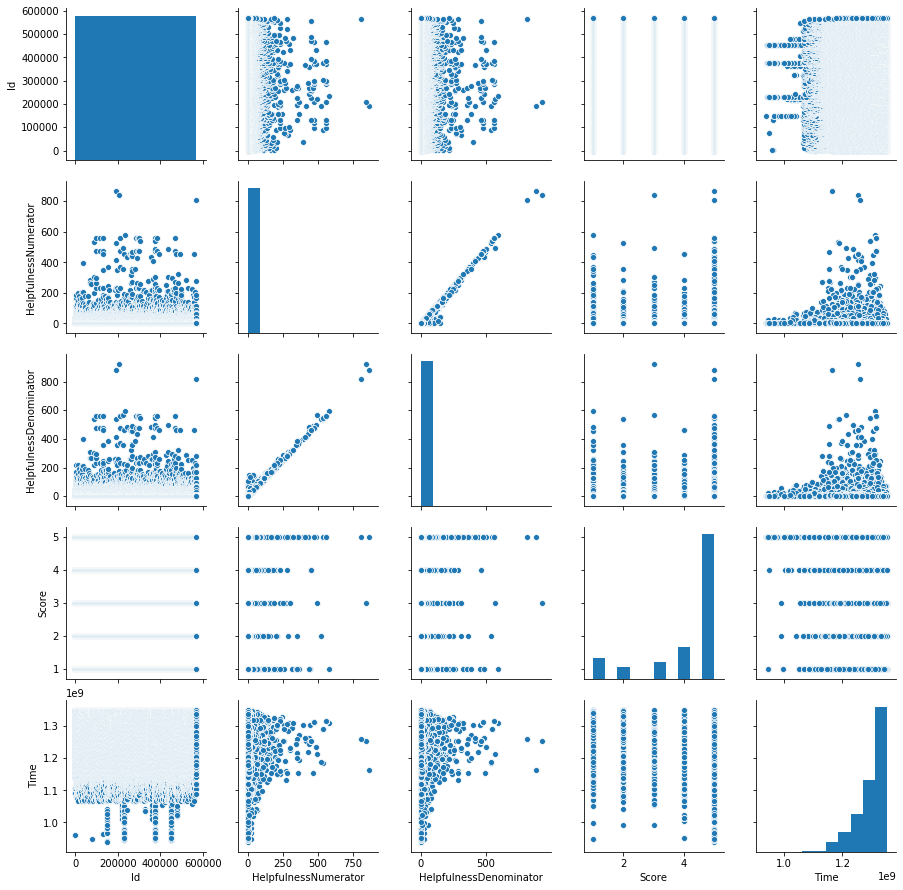

In [5]:
sns.pairplot(foods)
plt.show()

In [6]:
foods[foods.isnull().any(axis=1)]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all g...
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
38874,38875,B000AYDGZ2,A36BVYD0NT7Z0F,NaN,2,3,1,1278374400,doesn't anyone care that they are putting BHT ...,I called Kellogg's to see why Special K red be...
40548,40549,B00020HHRW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
49800,49801,B000CRHQN0,A2LYFY32LXQDON,NaN,0,0,2,1282608000,They were melted and the chocolate had turned ...,We love these bars but i won't order them ship...
67077,67078,B0006348H2,A2P0P67Y55SNOX,NaN,1,1,5,1314662400,Wheatgrass,Kitty seems to like this sprinkled on her food...
101106,101107,B0014B0HWK,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
102979,102980,B000FVDWU4,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...
106550,106551,B001EQ5DG0,A1P500QXEG3IUZ,NaN,0,0,5,1326758400,Finally!,"You cannot find this in the stores anymore, it..."
117515,117516,B0016B7Z32,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,I only used two maybe three tea bags and got p...


# Data preparation

In [7]:
#Selecting only those columns that are helpful towards our analysis
foods1=foods[['Id','ProductId','UserId','HelpfulnessNumerator','HelpfulnessDenominator','Score','Summary','Text']]
foods1.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
foods1[foods1.isnull().any(axis=1)]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
33958,33959,B00412W76S,A3TJPSWY2HE4BS,1,24,2,NaN,I only used two maybe three tea bags and got p...
40548,40549,B00020HHRW,A3TJPSWY2HE4BS,1,24,2,NaN,I only used two maybe three tea bags and got p...
101106,101107,B0014B0HWK,A3TJPSWY2HE4BS,1,24,2,NaN,I only used two maybe three tea bags and got p...
102979,102980,B000FVDWU4,A3TJPSWY2HE4BS,1,24,2,NaN,I only used two maybe three tea bags and got p...
117515,117516,B0016B7Z32,A3TJPSWY2HE4BS,1,24,2,NaN,I only used two maybe three tea bags and got p...
155712,155713,B0009VO58S,A3TJPSWY2HE4BS,1,24,2,NaN,I only used two maybe three tea bags and got p...
178290,178291,B00073IVAQ,A3TJPSWY2HE4BS,1,24,2,NaN,I only used two maybe three tea bags and got p...
198474,198475,B000FVBYCW,A3TJPSWY2HE4BS,1,24,2,NaN,I only used two maybe three tea bags and got p...
212691,212692,B00020HHAO,A3TJPSWY2HE4BS,1,24,2,NaN,I only used two maybe three tea bags and got p...
237565,237566,B000ELGPAO,A15AMT9T9A1309,1,1,3,NaN,This is a cool system only problem is that the...


In [9]:
#Dropping the 'na' rows as 
foods1_na=foods1.dropna()
foods1_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568427 entries, 0 to 568453
Data columns (total 8 columns):
Id                        568427 non-null int64
ProductId                 568427 non-null object
UserId                    568427 non-null object
HelpfulnessNumerator      568427 non-null int64
HelpfulnessDenominator    568427 non-null int64
Score                     568427 non-null int64
Summary                   568427 non-null object
Text                      568427 non-null object
dtypes: int64(4), object(4)
memory usage: 39.0+ MB


In [10]:
#Checking duplicate values
foods1_na[foods1_na['Id'].duplicated()]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text


In [11]:
#Sentiment function on basis of score
def sentiment(x):
    if x['Score']>3:
        return 'Positive'
    elif x['Score']==3:
        return 'Neutral'
    else:
        return 'Negative'

In [12]:
foods1_na['Sentiment']= foods1.apply(sentiment, axis=1)

C:\Users\Heda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
foods1_na.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...,Positive


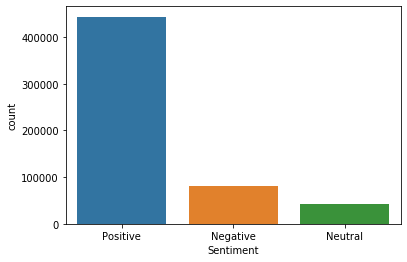

In [14]:
sns.countplot(foods1_na['Sentiment'])
plt.show()

In [15]:
#To find users who did not like the Product and gave it a rating below 2
# poor_reviews=foods1_na['UserId'].where(foods1_na['Score'] < 3)
# pr = poor_reviews.dropna()
# print(pr)

C:\Users\Heda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Heda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1, 'How helpful users find among user scores')

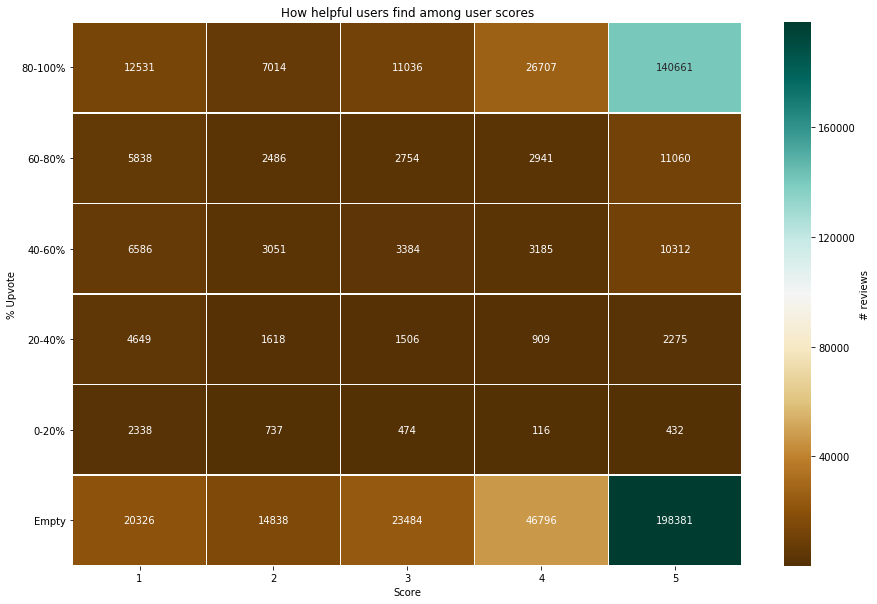

In [18]:
#How helpful does users find the reviews
foods1_na['Helpful %'] = np.where(foods1_na['HelpfulnessDenominator'] > 0, foods1_na['HelpfulnessNumerator'] / foods1_na['HelpfulnessDenominator'], -1)
foods1_na['% Upvote'] = pd.cut(foods1_na['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
foods1_na.head()

#Heat map
hm = foods1_na.groupby(['Score', '% Upvote']).agg({'Id': 'count'})
hm = hm.unstack()
hm.columns = hm.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(hm[hm.columns[::-1]].T, cmap = 'BrBG', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.title('How helpful users find among user scores')

# WordCloud

In [19]:
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

cluster = foods1_na.groupby("Score")["Summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["Summary_Clean"] = cluster1["Summary"].apply(cleanup)

stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

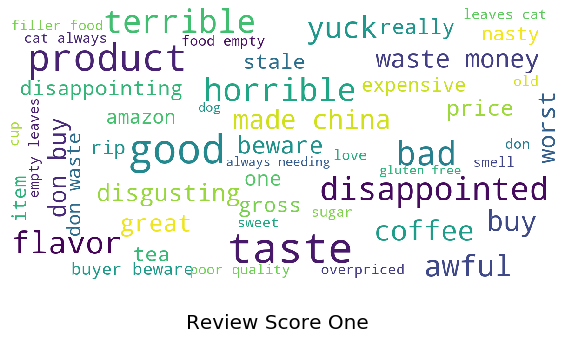

In [20]:
show_wordcloud(cluster1["Summary_Clean"][0], title = "Review Score One")

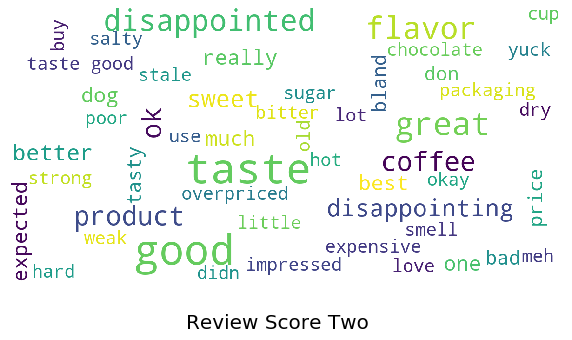

In [21]:
show_wordcloud(cluster1["Summary_Clean"][1] , title = "Review Score Two")

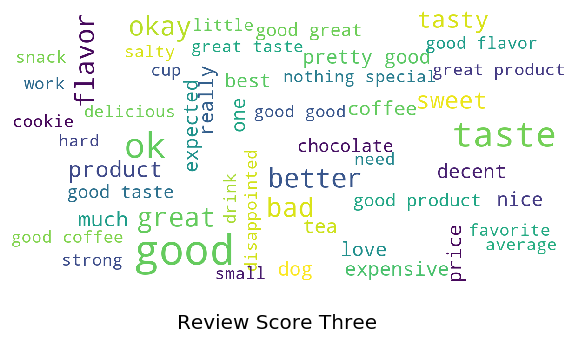

In [22]:
show_wordcloud(cluster1["Summary_Clean"][2], title = "Review Score Three")

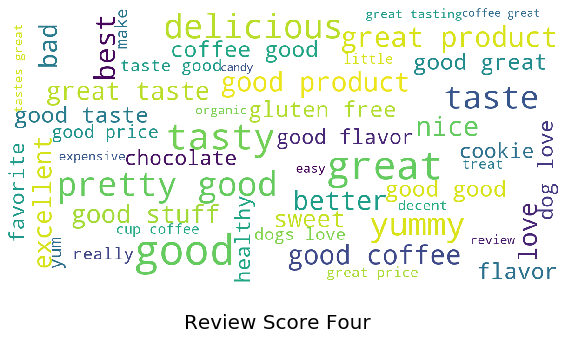

In [23]:
show_wordcloud(cluster1["Summary_Clean"][3], title = "Review Score Four")

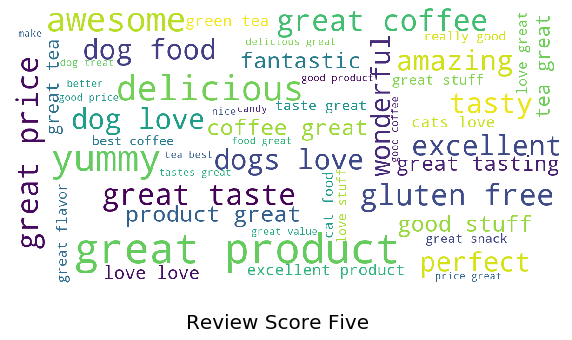

In [24]:
show_wordcloud(cluster1["Summary_Clean"][4], title = "Review Score Five")

# Preparing data for text mining

In [43]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
sno = nltk.stem.SnowballStemmer('english')

#Function to remove html tags
def cleanhtml(sentence1):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence1)
    return cleantext

#Function to remove punctuations
def cleanpunc (sentence1):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'', sentence1)
    cleaned = re.sub(r'[.|,|)|(|\|/]', r' ', cleaned)
    return cleaned

In [44]:
#Dropping the rows with score = 3, as we have considered it as neutral for simplicity of our analysis
foods1_na.drop(foods1_na[foods1_na["Score"] == 3].index, inplace = True)

In [45]:
foods1_na.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Helpful %,Positivity
count,525789.000000,525789.000000,525789.000000,525789.000000,525789.000000,525789.000000
mean,284598.651693,1.747328,2.208508,4.279257,-0.066429,0.844021
std,163984.988175,7.575997,8.194146,1.316663,0.927173,0.362836
min,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
25%,142729.000000,0.000000,0.000000,4.000000,-1.000000,1.000000
50%,284985.000000,0.000000,1.000000,5.000000,0.000000,1.000000
75%,426449.000000,2.000000,2.000000,5.000000,1.000000,1.000000
max,568454.000000,866.000000,878.000000,5.000000,3.000000,1.000000


In [46]:
foods1_na[foods1_na['Score'] != 3]
foods1_na['Positivity'] = np.where(foods1_na['Score'] > 3, 1, 0)
foods1_na.head()

C:\Users\Heda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text,Sentiment,Helpful %,% Upvote,Positivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive,1.0,80-100%,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative,-1.0,Empty,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...,Positive,1.0,80-100%,1
3,4,B000UA0QIQ,A395BORC6FGVXV,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...,Negative,1.0,80-100%,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,0,0,5,Great taffy,Great taffy at a great price. There was a wid...,Positive,-1.0,Empty,1


In [61]:
X_train, X_test, y_train, y_test = train_test_split(foods1_na['Text'], foods1_na['Positivity'] , random_state=3)

In [62]:
vect = CountVectorizer(min_df= 5, ngram_range= (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

528092

In [71]:
X_test_vectorized = vect.transform(X_test)

In [63]:
foods1_na['Positivity'].value_counts()

1    443777
0     82012
Name: Positivity, dtype: int64

# ML Models

# Logistic Regression

In [64]:
#Multiple Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
predictions = lr.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9302679895369559


In [66]:
conf_matr = confusion_matrix(y_test, predictions)

Text(0.5, 1, 'Confusion Matrix')

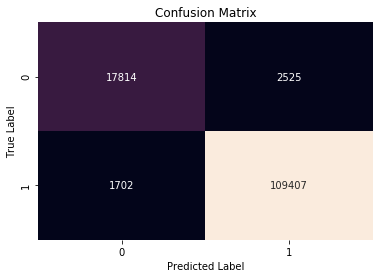

In [67]:
sns.heatmap(conf_matr,annot=True,cbar=False, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [69]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     20339
           1       0.98      0.98      0.98    111109

    accuracy                           0.97    131448
   macro avg       0.95      0.93      0.94    131448
weighted avg       0.97      0.97      0.97    131448



In [74]:
predict_p_lr=lr.predict_proba(X_test_vectorized)
fpr1, tpr1, thresholds1 = roc_curve(y_test, predict_p_lr[:,1])

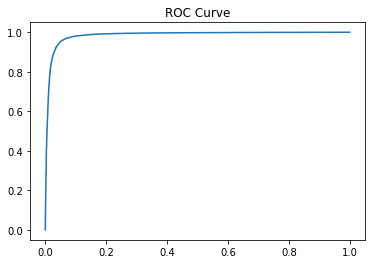

In [75]:
plt.plot(fpr1,tpr1)
plt.title('ROC Curve')
plt.show()

# Decision Tree

In [76]:
#Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train_vectorized, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [77]:
predictions1 = dt.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions1))

AUC:  0.8346316956540194


In [78]:
conf_matr_dt = confusion_matrix(y_test, predictions1)

Text(0.5, 1, 'Confusion Matrix')

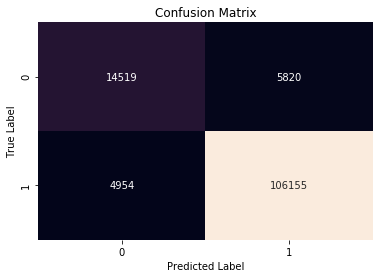

In [79]:
sns.heatmap(conf_matr_dt,annot=True,cbar=False, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [81]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     20339
           1       0.95      0.96      0.95    111109

    accuracy                           0.92    131448
   macro avg       0.85      0.83      0.84    131448
weighted avg       0.92      0.92      0.92    131448



In [82]:
predict_p_dt=dt.predict_proba(X_test_vectorized)
fpr2, tpr2, thresholds2 = roc_curve(y_test, predict_p_dt[:,1])

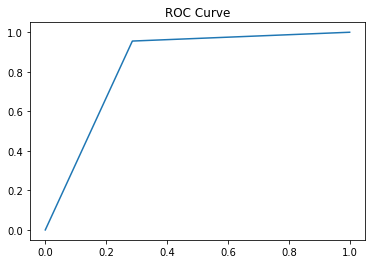

In [83]:
plt.plot(fpr2,tpr2)
plt.title('ROC Curve')
plt.show()

# Random Forest

In [84]:
#Random Forest
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train_vectorized, y_train)

C:\Users\Heda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [85]:
predictions2 = rf.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions2))

AUC:  0.7799108701281559


In [86]:
conf_matr_rf = confusion_matrix(y_test, predictions2)

Text(0.5, 1, 'Confusion Matrix')

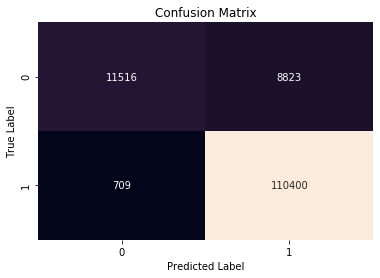

In [87]:
sns.heatmap(conf_matr_rf,annot=True,cbar=False, fmt='g')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

In [89]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71     20339
           1       0.93      0.99      0.96    111109

    accuracy                           0.93    131448
   macro avg       0.93      0.78      0.83    131448
weighted avg       0.93      0.93      0.92    131448



In [90]:
predict_p_rf=rf.predict_proba(X_test_vectorized)
fpr3, tpr3, thresholds3 = roc_curve(y_test, predict_p_rf[:,1])

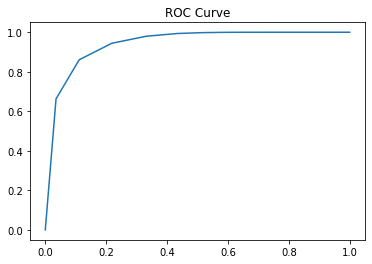

In [91]:
plt.plot(fpr3,tpr3)
plt.title('ROC Curve')
plt.show()

# ROC Curve

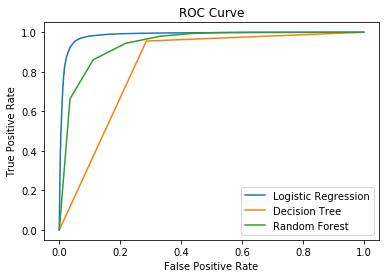

In [95]:
plt.plot(fpr1,tpr1, label='Logistic Regression')
plt.plot(fpr2,tpr2, label='Decision Tree')
plt.plot(fpr3,tpr3, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()